# 1. Regression

## 1.1. Load Data and Train Model

In [17]:
from sklearn.ensemble import RandomForestRegressor
from holisticai.datasets import load_dataset
from sklearn.metrics import mean_squared_error

dataset = load_dataset('us_crime')
dataset = dataset.train_test_split(test_size=0.2, random_state=42)
train = dataset['train']
test = dataset['test']

model = RandomForestRegressor()
model.fit(train['X'], train['y'])

mean_squared_error(test['y'], model.predict(test['X']))

np.float64(0.020095520476190478)

In [18]:
from holisticai.explainability.metrics import regression_explainability_metrics
from holisticai.utils import RegressionProxy
from holisticai.utils.feature_importances import compute_permutation_feature_importance
from holisticai.utils.inspection import compute_partial_dependence

proxy = RegressionProxy(predict=model.predict)

importances  = compute_permutation_feature_importance(X=train['X'], y=train['y'], proxy=proxy)

ranked_importances = importances.top_alpha(0.8)

partial_dependencies = compute_partial_dependence(train['X'], features=ranked_importances.feature_names, proxy=proxy)

conditional_importances  = compute_permutation_feature_importance(X=train['X'], y=train['y'], proxy=proxy, importance_type="conditional")

regression_explainability_metrics(importances, partial_dependencies, conditional_importances)

,value,reference
metric,,
Alpha Importance Score,0.257426,0.0
XAI Ease Score,0.903846,1.0
Position Parity,0.235029,1.0
Rank Alignment,0.159876,1.0
Spread Ratio,0.676111,0.0
Spread Divergence,0.596050,1.0


<Axes: title={'center': 'Feature Importance'}, xlabel='Importance', ylabel='Features'>

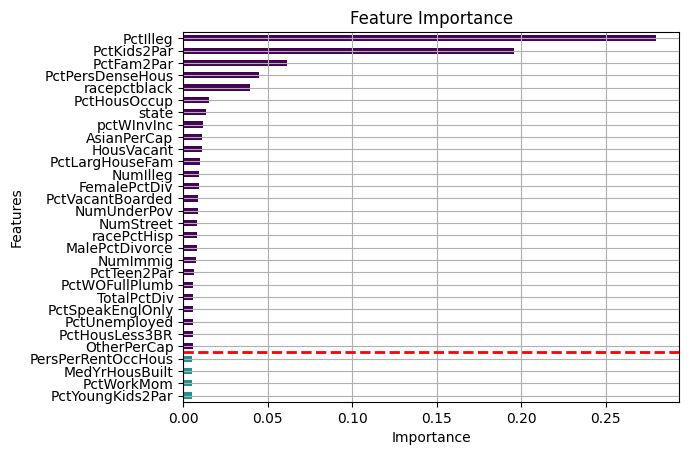

In [22]:
from holisticai.explainability.plots import plot_feature_importance

plot_feature_importance(importances, top_n=30)

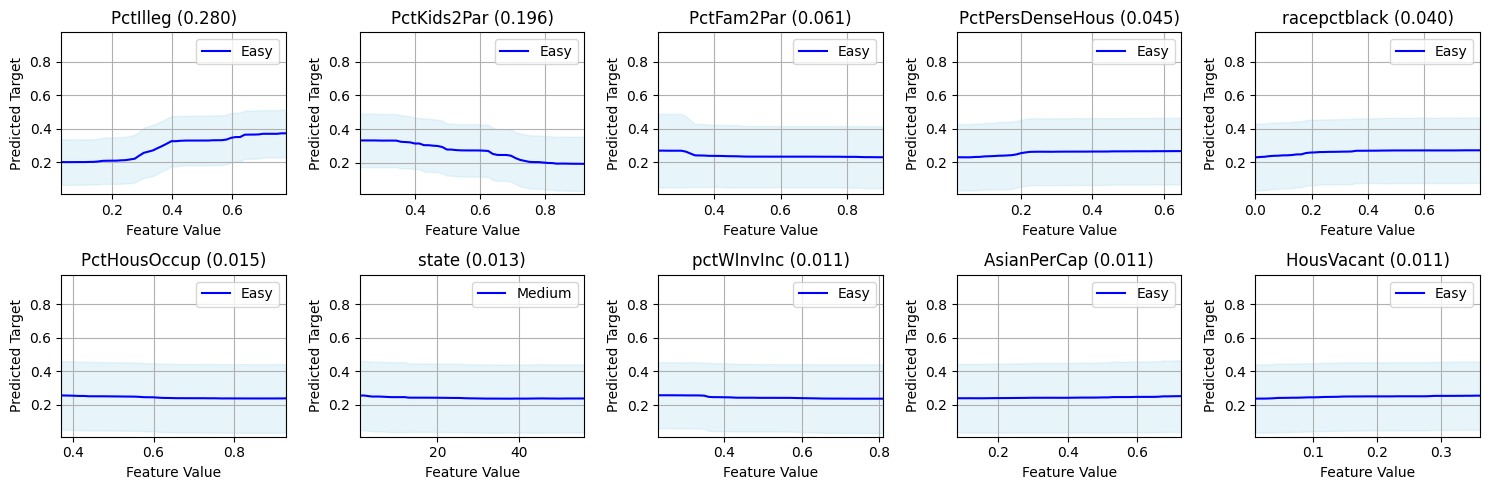

In [23]:
from holisticai.explainability.plots import plot_partial_dependence

plot_partial_dependence(partial_dependencies, ranked_importances, subplots=(2, 5), figsize=(15,5))

# 2. Classification

In [24]:
from sklearn.linear_model import LogisticRegression
from holisticai.datasets import load_dataset
from sklearn.metrics import accuracy_score

dataset = load_dataset('adult')
dataset = dataset.train_test_split(test_size=0.2, random_state=42)
train = dataset['test']
test = dataset['test']

model = LogisticRegression()
model.fit(train['X'], train['y'])

accuracy_score(test['y'], model.predict(test['X']))

0.7957987838584853

In [25]:
from holisticai.explainability.metrics import classification_explainability_metrics
from holisticai.utils import BinaryClassificationProxy
from holisticai.utils.feature_importances import compute_permutation_feature_importance
from holisticai.utils.inspection import compute_partial_dependence

proxy = BinaryClassificationProxy(predict=model.predict, predict_proba=model.predict_proba, classes=model.classes_)

importances  = compute_permutation_feature_importance(X=train['X'], y=train['y'], proxy=proxy)

ranked_importances = importances.top_alpha(0.8)

partial_dependencies = compute_partial_dependence(train['X'], features=ranked_importances.feature_names, proxy=proxy)

conditional_importances  = compute_permutation_feature_importance(X=train['X'], y=train['y'], proxy=proxy, importance_type="conditional")

classification_explainability_metrics(importances, partial_dependencies, conditional_importances)

,value,reference
metric,,
Alpha Importance Score,0.020619,0.0
XAI Ease Score,0.750000,1.0
Position Parity,0.625000,1.0
Rank Alignment,0.666667,1.0
Spread Ratio,0.196699,0.0
Spread Divergence,0.924264,1.0


<Axes: title={'center': 'Feature Importance'}, xlabel='Importance', ylabel='Features'>

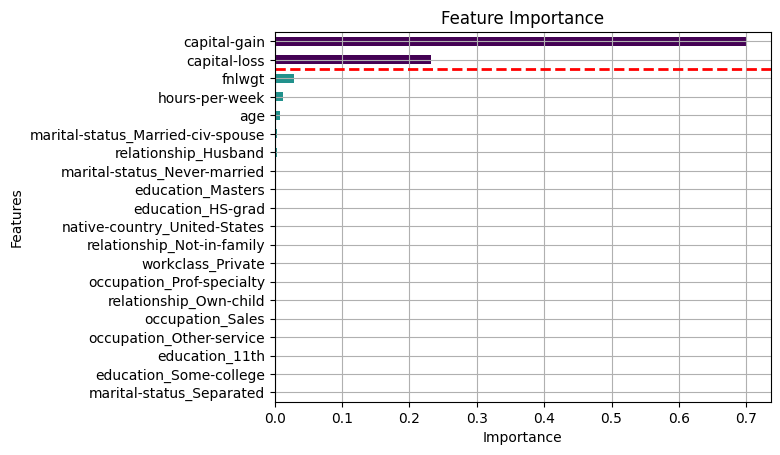

In [26]:
from holisticai.explainability.plots import plot_feature_importance

plot_feature_importance(importances)

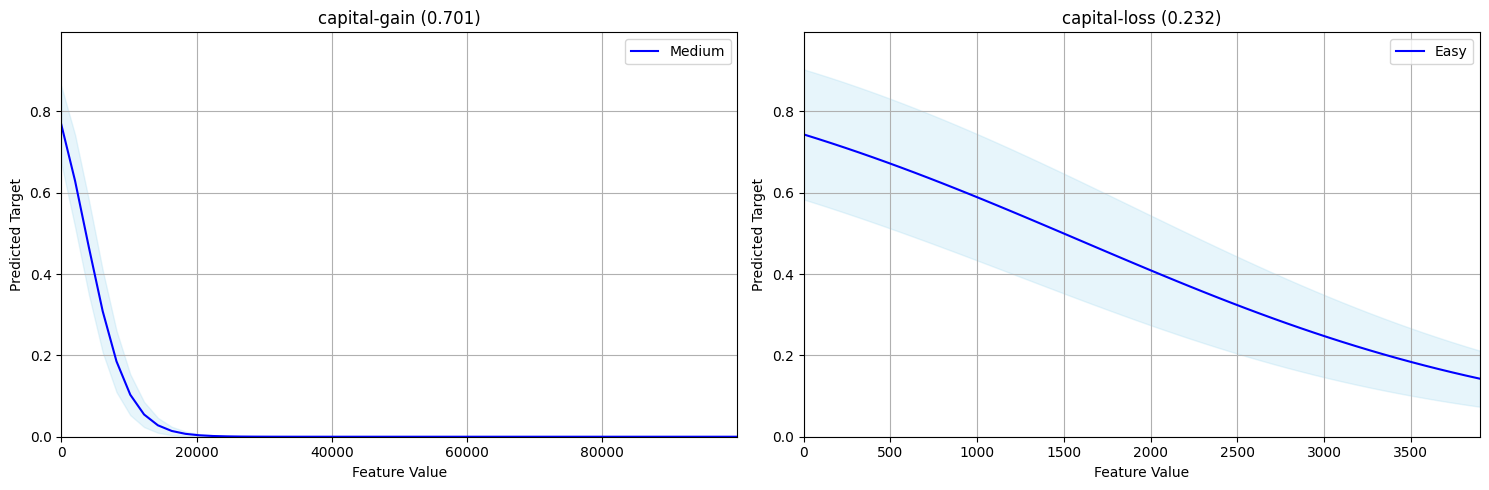

In [27]:
from holisticai.explainability.plots import plot_partial_dependence

plot_partial_dependence(partial_dependencies, ranked_importances, class_idx=1, subplots=(1,2), figsize=(15,5))

# 3. Multi Classification

In [28]:
from sklearn.linear_model import LogisticRegression
from holisticai.datasets import load_dataset
from sklearn.metrics import accuracy_score

dataset = load_dataset(dataset_name="student_multiclass")
dataset = dataset.train_test_split(test_size=0.2, random_state=42)
train = dataset['test']
test = dataset['test']

model = LogisticRegression()
model.fit(train['X'], train['y'])

accuracy_score(test['y'], model.predict(test['X']))

0.810126582278481

In [29]:
from holisticai.explainability.metrics import multiclass_explainability_metrics
from holisticai.utils import MultiClassificationProxy
from holisticai.utils.feature_importances import compute_permutation_feature_importance
from holisticai.utils.inspection import compute_partial_dependence

proxy = MultiClassificationProxy(predict=model.predict, predict_proba=model.predict_proba, classes=model.classes_)

importances  = compute_permutation_feature_importance(X=train['X'], y=train['y'], proxy=proxy)

ranked_importances = importances.top_alpha(0.8)

partial_dependencies = compute_partial_dependence(train['X'], features=ranked_importances.feature_names, proxy=proxy)

conditional_importances  = compute_permutation_feature_importance(X=train['X'], y=train['y'], proxy=proxy, importance_type="conditional")

multiclass_explainability_metrics(importances, partial_dependencies, conditional_importances)

,value,reference
metric,,
Alpha Importance Score,0.461538,0.0
XAI Ease Score,0.902778,1.0
Position Parity,0.094266,1.0
Rank Alignment,0.350794,1.0
Spread Ratio,0.855906,0.0
Spread Divergence,0.412491,1.0


<Axes: title={'center': 'Feature Importance'}, xlabel='Importance', ylabel='Features'>

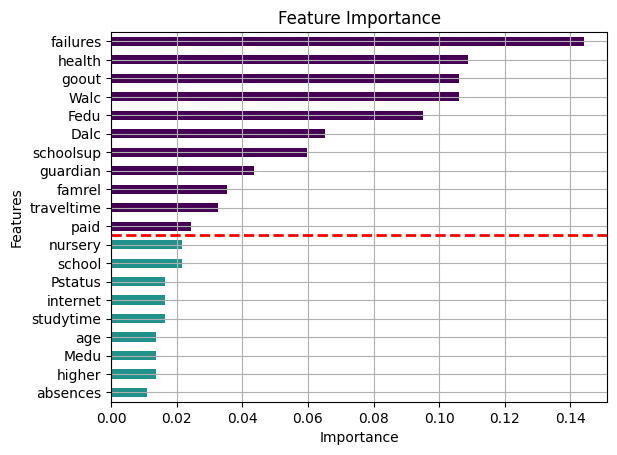

In [30]:
from holisticai.explainability.plots import plot_feature_importance

plot_feature_importance(importances)

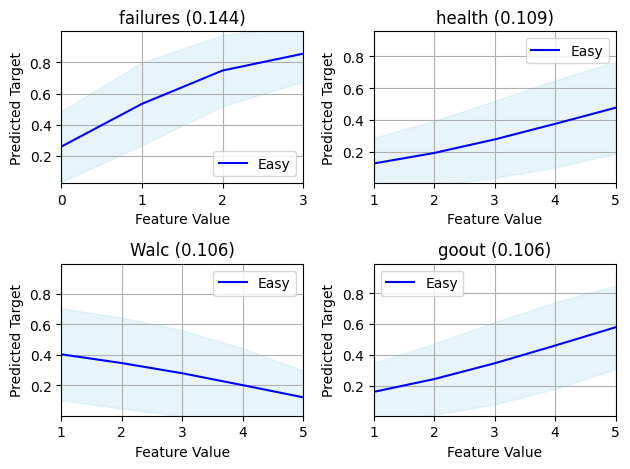

In [31]:
from holisticai.explainability.plots import plot_partial_dependence

plot_partial_dependence(partial_dependencies, ranked_importances, subplots=(2,2), class_idx=0)